In [15]:
from knn import KNN_linear_regressor, load_npz, split_data, mse_loss
from lw import Local_weighted_linear_regressor
from knn_nonlinear import KNN_nonlinear_regressor
import matplotlib.pyplot as plt
x, y = load_npz('./data1.npz')
(x_train, y_train), (x_test, y_test) = split_data(x, y, seed=456)


lw_reg = Local_weighted_linear_regressor()
knn_reg = KNN_linear_regressor(20)
knn_nonlinear_reg = KNN_nonlinear_regressor(20)

lw_reg.fit(x, y)
knn_reg.fit(x, y)
knn_nonlinear_reg.fit(x, y)

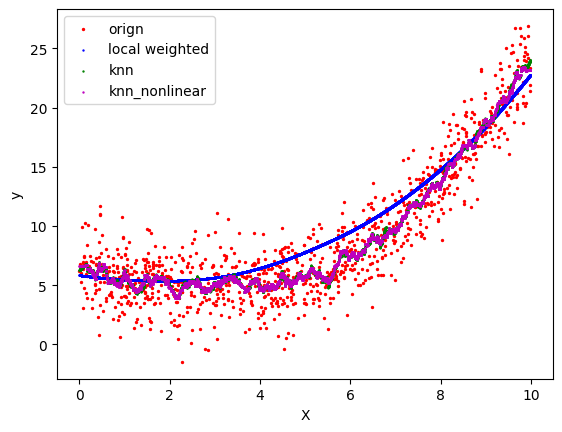

In [16]:
import numpy as np
plt.figure()
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(x, y, s=2, c='r',label="orign")

new_x = np.arange(min(x), max(x), 0.001)

lw_y = lw_reg.predict(new_x)
knn_y = knn_reg.predict(new_x)
knn_nonliear_y = knn_nonlinear_reg.predict(new_x)

plt.scatter(new_x, lw_y, c='b',s=0.5, label="local weighted")
plt.scatter(new_x, knn_y, c='g',s=0.5, label="knn")
plt.scatter(new_x, knn_nonliear_y, c='m',s=0.5, label="knn_nonlinear")
plt.legend()
plt.show()


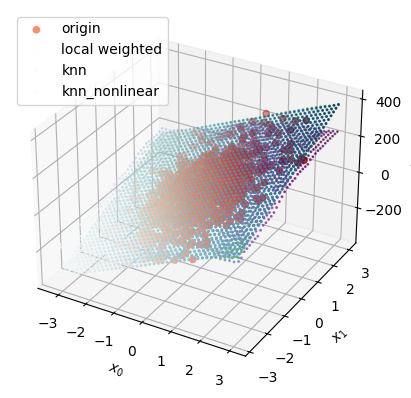

In [13]:
import matplotlib.pyplot as plt
import numpy as np
ax = plt.axes(projection='3d')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$y$')
x0 = x[:, 0]
x1 = x[:, 1]

ax.scatter(x0, x1, y, c=y, marker='o', cmap='Reds',label="origin")
x0_range = np.arange(min(x0), max(x0), 0.15)
x1_range = np.arange(min(x1), max(x1), 0.15)

new_x = []
for x0 in x0_range:
    for x1 in x1_range:
        new_x.append([x0, x1])
new_x = np.array(new_x)


lw_y = lw_reg.predict(new_x)
knn_y = knn_reg.predict(new_x)
knn_nonliear_y = knn_nonlinear_reg.predict(new_x)

ax.scatter(new_x[:,0], new_x[:,1], lw_y, c=lw_y, marker='o', s=1, cmap='Blues', label="local weighted")
ax.scatter(new_x[:,0], new_x[:,1], knn_y, c=knn_y,marker='o', s=1, cmap='Greens', label="knn")
ax.scatter(new_x[:,0], new_x[:,1], knn_nonliear_y, c=knn_nonliear_y,marker='o', cmap='BuPu', s=1, label="knn_nonlinear")

# new_y = self.predict(new_x)
# ax.scatter(new_x[:,0], new_x[:,1], new_y, c=new_y, cmap='Blues', marker='o', s=1)


plt.legend()
plt.show()

Text(0.5, 0, 'neighbor')

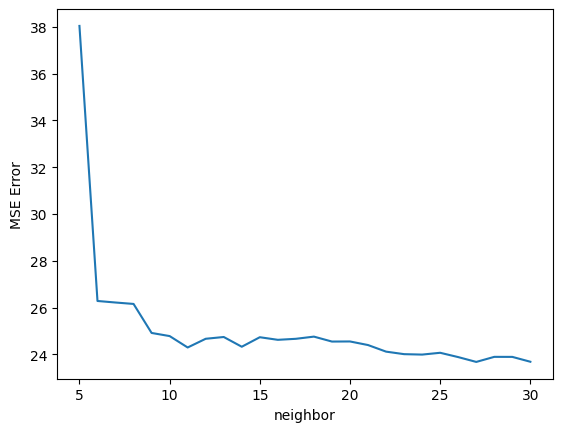

In [18]:
import matplotlib.pyplot as plt
import numpy as np

losses = []
for n in range(5, 30 + 1):
    
    knn_reg.fit(x_train, y_train)
    y_predict = knn_reg.predict(x_test)
    losses.append(mse_loss(y_predict, y_test))
plt.plot(range(5, 30 + 1), losses)
plt.ylabel('MSE Error')
plt.xlabel('neighbor')

In [ ]:
knn_reg.fit(x, y)
lw_reg.fit(x, y)